In [1]:
import numpy as np
import matplotlib.pyplot as plt


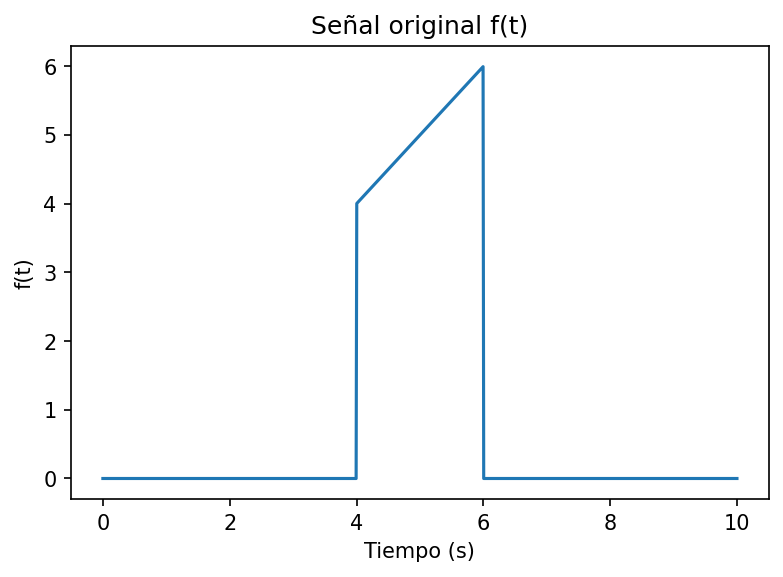

In [2]:

T = 10
t = np.linspace(0, T, 1000)
f = np.piecewise(t, [t < 0, ((t >= 4) & (t < 6)), t >= 6], [0, lambda x: x, 0])

plt.figure(figsize=(6, 4), dpi=150)
plt.plot(t, f)
plt.title("Señal original f(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("f(t)")

plt.savefig("outputs/dsp 04 - 01 - señal original")


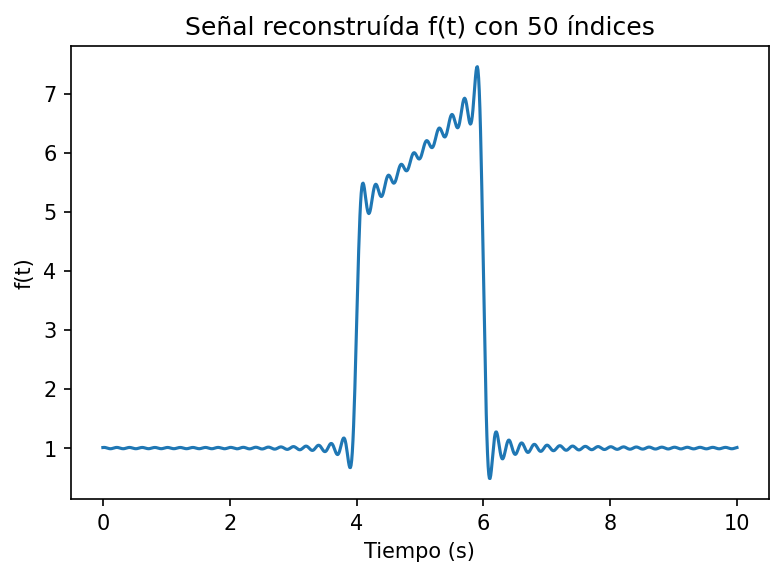

In [3]:
N = 50

f_n = np.ndarray(shape=(N, len(t)))

a = np.zeros(N)
b = np.zeros(N)

for i in range(N):
    # Integrando para obtener an y bn
    a[i] = 2/T * np.trapz(f * np.cos(2 * np.pi /T * i * t), t)
    b[i] = 2/T * np.trapz(f * np.sin(2 * np.pi /T * i * t), t)

    # Obteniendo f(t) cuando n=1, 2, 3, ...
    cos_n = a[i] * np.cos(2 * np.pi/T * i * t)
    sin_n = b[i] * np.sin(2 * np.pi/T * i * t)
    f_n[i][:] = cos_n + sin_n

f_r = np.zeros_like(t)

for n in range(N):
    f_r = f_r + f_n[n][:]

plt.figure(figsize=(6, 4), dpi=150)
plt.plot(t, f_r)
plt.title(f"Señal reconstruída f(t) con {N} índices")
plt.xlabel("Tiempo (s)")
plt.ylabel("f(t)")

plt.savefig("outputs/dsp 04 - 02 - señal reconstruida")